# Part II - Two layer FC network Sigmoid function included

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H = 200  #Hidden layers
std=1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 0.001
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    a = x.dot(w1)+b1
    h = 1.0/(1+np.exp(-a))
    y_pred = h.dot(w2)+b2

    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    accuracy = np.mean(y_pred-y)

    loss_history.append(loss)
    train_acc_history.append(accuracy)

    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw2 = h.T.dot(dy_pred)+reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w2-=lr*dw2
    b2-=lr*db2
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

    # Printing accuracies and displaying w as images
    if t%10==0:
        print('iteration %d / %d : loss %f : accracy %f  '%(t,iterations,loss,accuracy))







x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300 : loss 1.000045 : accracy -0.100023 : 
iteration 10 / 300 : loss 0.911739 : accracy -0.034283 : 
iteration 20 / 300 : loss 0.901296 : accracy -0.011883 : 
iteration 30 / 300 : loss 0.899233 : accracy -0.004162 : 
iteration 40 / 300 : loss 0.895167 : accracy -0.001466 : 
iteration 50 / 300 : loss 0.887190 : accracy -0.000525 : 
iteration 60 / 300 : loss 0.878747 : accracy -0.000194 : 
iteration 70 / 300 : loss 0.871904 : accracy -0.000074 : 
iteration 80 / 300 : loss 0.866812 : accracy -0.000029 : 
iteration 90 / 300 : loss 0.863105 : accracy -0.000012 : 
iteration 100 / 300 : loss 0.860248 : accracy -0.000005 : 
iteration 110 / 300 : loss 0.857840 : accracy -0.000002 : 
iteration 120 / 300 : loss 0.855625 : accracy -0.000003 : 
iteration 130 / 300 : loss 0.853470 : accracy -0.000006 : 
iteration 140 / 300 : loss 0.851336 : accracy -0.000008 : 
iteration 150 / 300 : loss 0.849236 : accracy 

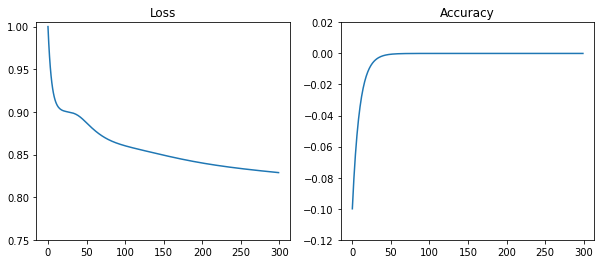

In [5]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(loss_history)
ax[0].set_title('Loss')
#ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_ylim(0.75,1.005)
ax[1].plot(train_acc_history)
ax[1].set_title('Accuracy')
#ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_ylim(-0.12,0.02)
plt.show()